## DDA3020 Autumn 2023 Homework 3 

### Programming Part 1：Tree

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble

1. we import the data from csv and deal with them. Since the data is highly correlated with each other, I choose to simply delete these data.

In [27]:
# we import the csv document
df = pd.read_csv('diabetes.csv')

# choose the set of data that could not be 0
column_deal = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# delete rows contain 0 which means missing data
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    df = df[df[i] != 0]


2. we can use seaborn to visualize the data

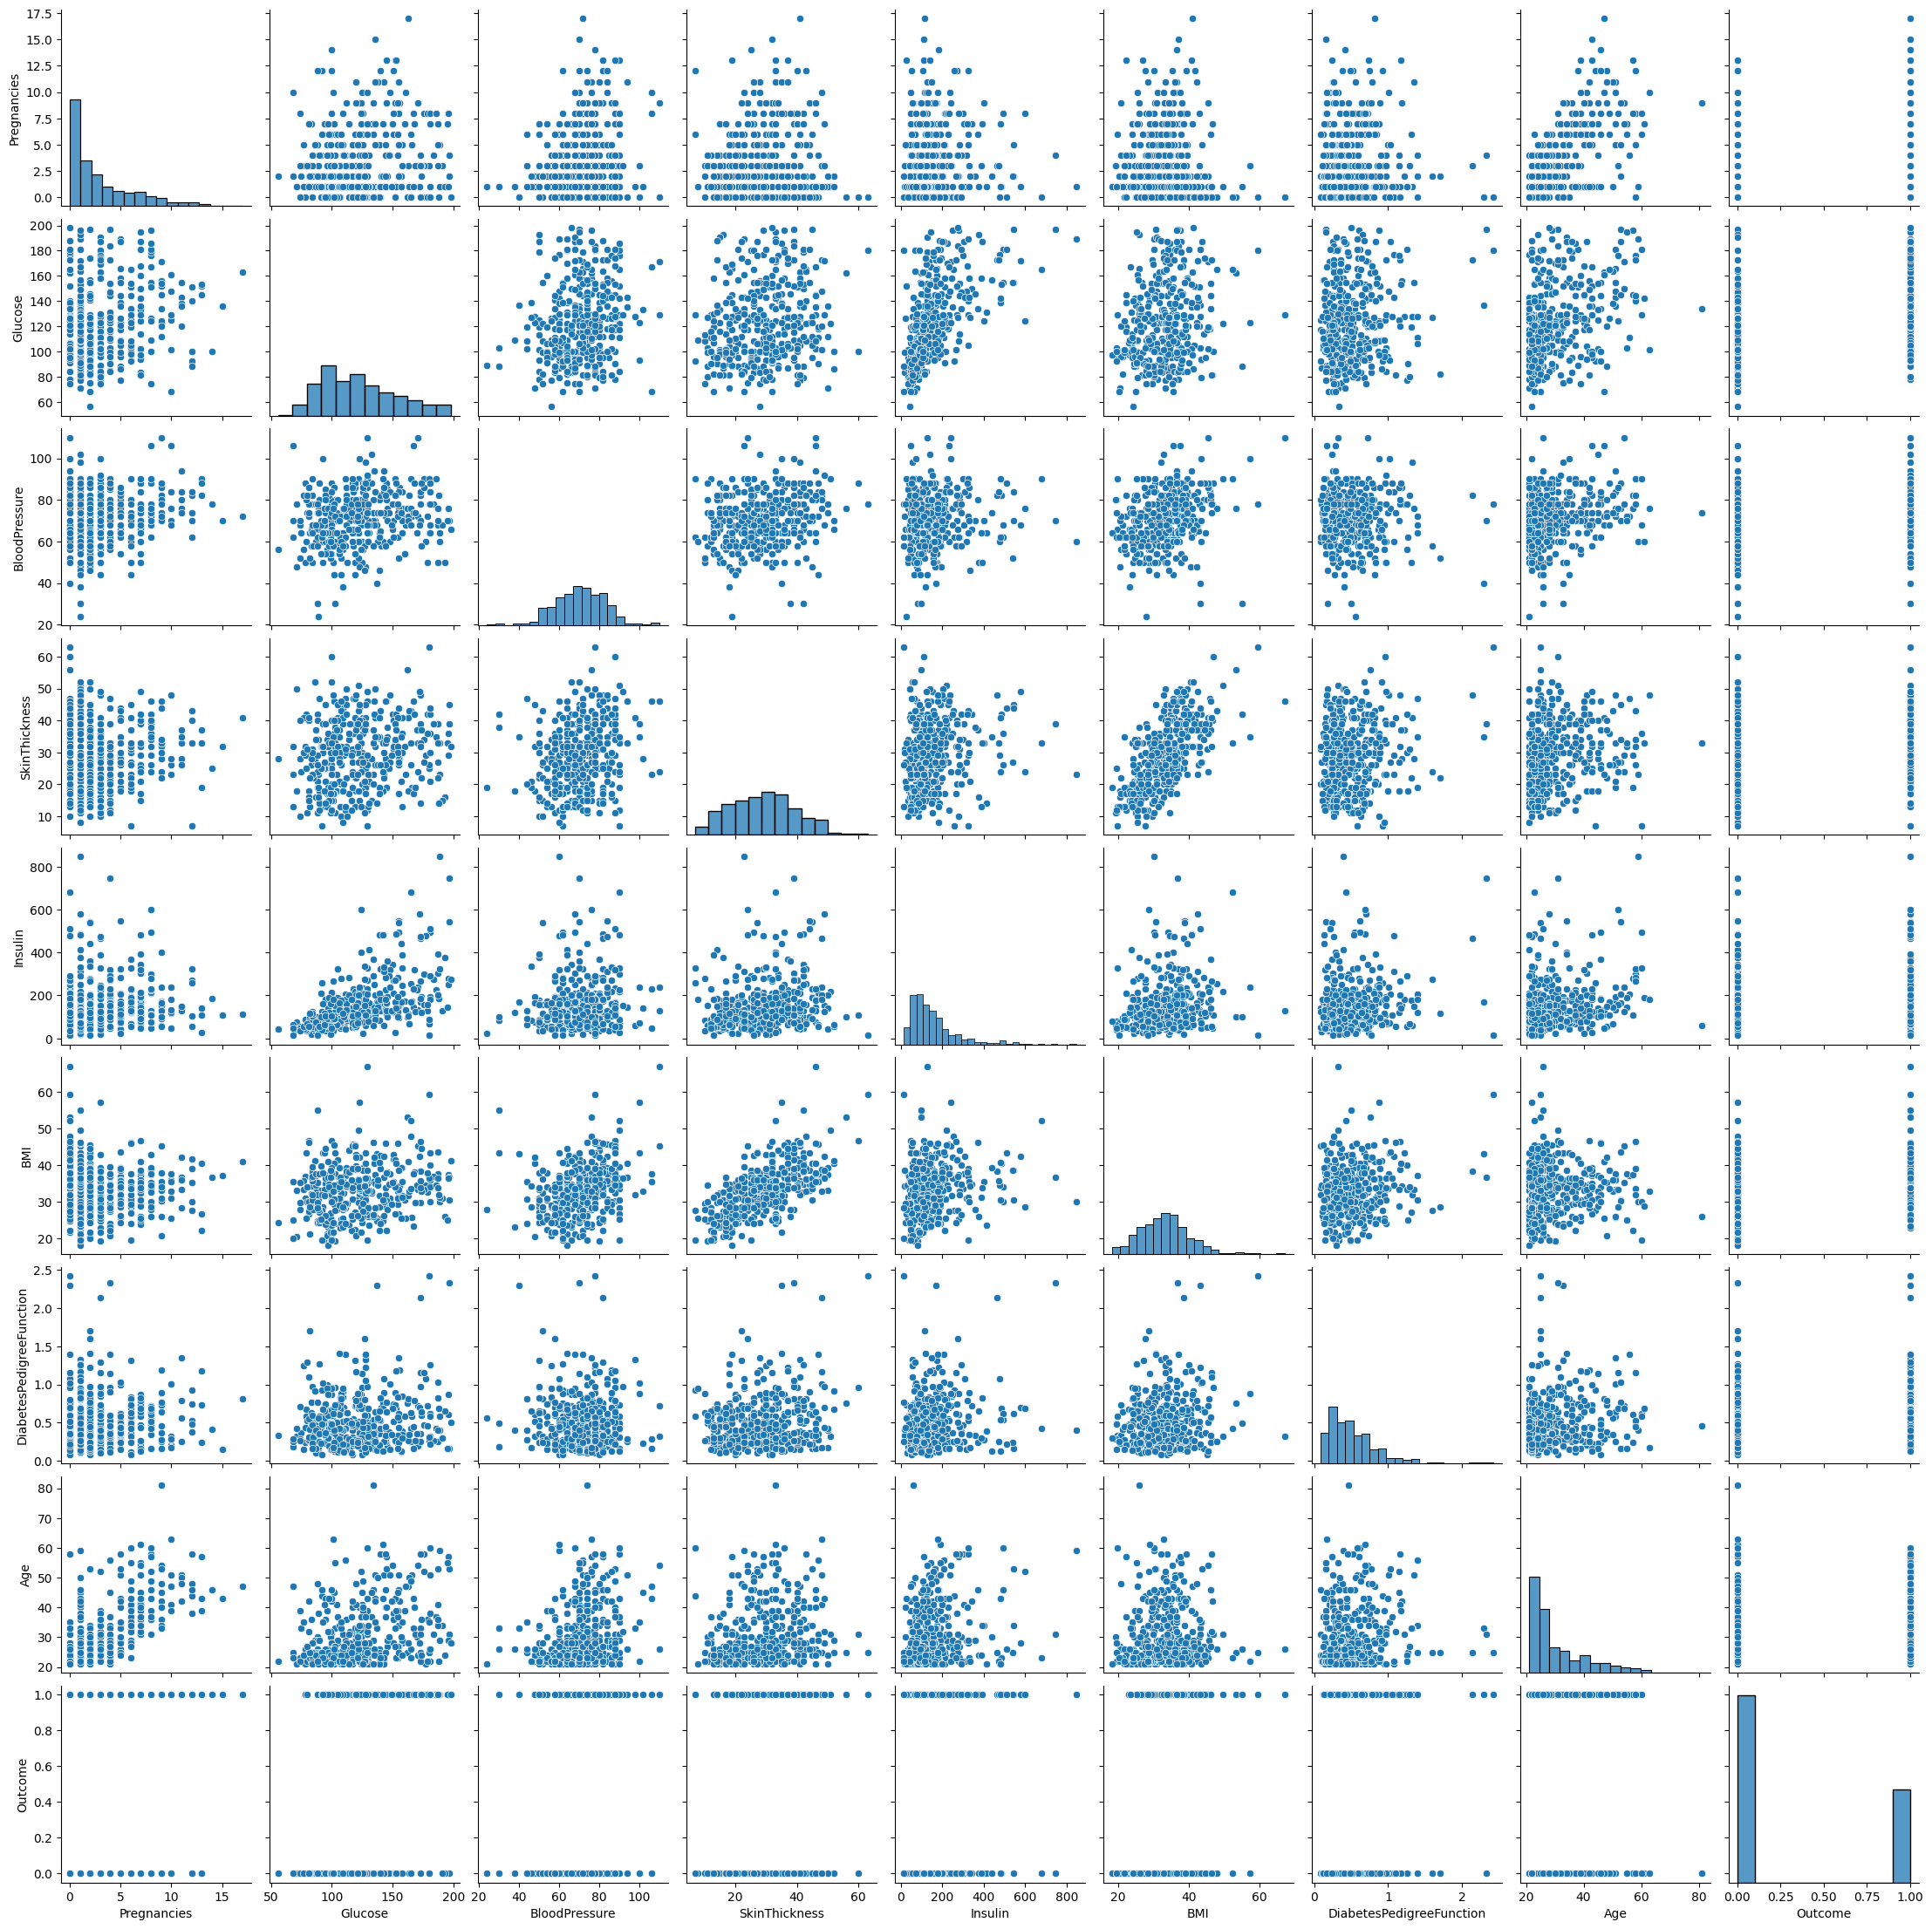

In [28]:
sns.pairplot(df)
plt.show()

3. we randomly shuffle the data, and devide them into two sets. One set which contains 67% of the data are used to train the model, the other set are used to test the accuracy of the model.

In [29]:
# split and shuffle the data
train_df, test_df = train_test_split(df, test_size=0.33, random_state=33)

# we then define four arrays for training and testing
X_train = np.array(train_df.iloc[:,0:8])
y_train = np.array(train_df.iloc[:,8]).reshape(-1,1)

X_test  = np.array(test_df.iloc[:,0:8])
y_test  = np.array(test_df.iloc[:,8]).reshape(-1,1)

4. we use the tree function offered by sklearn to train the model and test its result

In [30]:
# import the function and train the model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# we use the test data to test the accuracy of the model
y_predict = dt_classifier.predict(X_test)
y_predict = y_predict.reshape(-1,1)

# calculate the total errors in predicting y_test
residual = abs(y_test - y_predict)
error_DT = np.sum(residual)

5. use the bagging function to train the model

In [31]:
errors = []
for n_learners in range(10,1000):
    base_estimator = tree.DecisionTreeClassifier()

    # every time we use different n_learners
    Bagging = ensemble.BaggingRegressor(base_estimator = base_estimator, n_estimators = n_learners)
    Bagging.fit(X_train,y_train.ravel())

    # we evaluate the training result
    y_predict = Bagging.predict(X_test)
    y_predict = y_predict.reshape(-1,1)
    residual = abs(y_test - y_predict)
    error_BG = np.sum(residual)

    # we use the list errors to record each time's error
    errors.append(error_BG)
errors = np.array(errors)

6. we visualize the classification errors

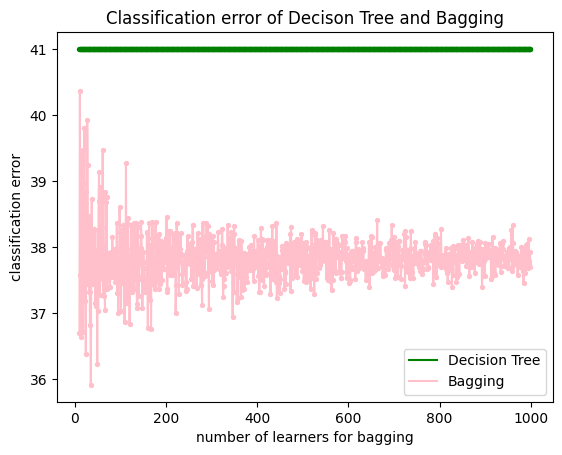

In [32]:
# we simply compare the error of decition tree with each error of bagging
x = np.array(range(10,1000))
error_DT = np.array([error_DT]*990)
figure,ax = plt.subplots()
plt.title('Classification error of Decison Tree and Bagging')

# use green to plot the classification error for decition tree
ax.scatter(x,error_DT,s=8,color = 'green')
ax.plot(x,error_DT,color="green", linestyle = 'solid', label='Decision Tree')

# use pink to plot the classification error for bagging
ax.scatter(x,errors,s=8,color='pink')
ax.plot(x,errors,color='pink',linestyle = 'solid', label='Bagging')

ax.set_xlabel('number of learners for bagging')
ax.set_ylabel('classification error')
plt.legend()
plt.show()

### Comments: 
We can find that the pink line is always under the green line which means that the classification errors of bagging are always smaller than that of decition tree. This also testifies the statement of "bagging" on the other side. So when we are construction a tree model, bagging may be a better choice for us if we want to get more accurate model.